# MDI341: TP Graphs

In [1]:
import sys
print(sys.version)

2.7.12 |Anaconda 4.1.1 (64-bit)| (default, Jun 29 2016, 11:07:13) [MSC v.1500 64 bit (AMD64)]


In [2]:
# coding: utf-8
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import os.path
from sklearn.metrics import accuracy_score
import urllib
import time
import tarfile
import pandas as pd
import seaborn as sns

**Note** : la documentation de NetworkX se trouve [ici](http://networkx.readthedocs.io/)

## Analyse de graphes

### Erdős-Rényi

#### Question 1

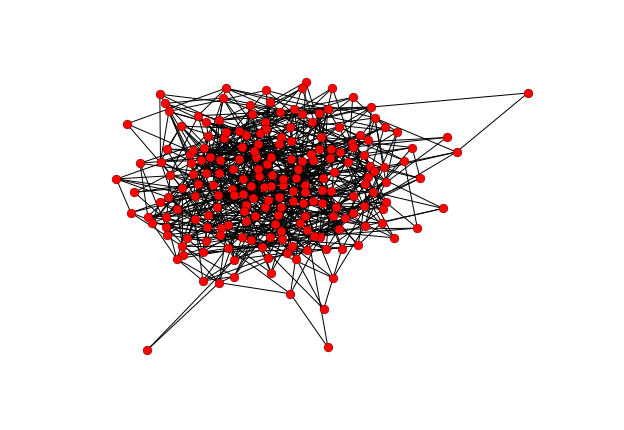

In [3]:
n = 200
p = 0.04
G_erdos = nx.erdos_renyi_graph(n,p,seed=42)
nx.draw(G_erdos, node_size=80)

#### Question 2

In [4]:
print "Nombre d'aretes: ", G_erdos.number_of_edges()
print "Nombre de noeuds: ", G_erdos.number_of_nodes()

Nombre d'aretes:  742
Nombre de noeuds:  200


In [5]:
print "Degres par noeud :"
degree_by_node_df = pd.DataFrame.from_dict(G_erdos.degree(), orient='index')
degree_by_node_df.T

Degres par noeud :


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,8,7,11,4,5,10,3,7,6,5,...,11,7,11,6,9,8,3,10,6,7


In [6]:
print "Le degre maximum est :"
mx = max(degree_by_node_df[0])
print mx
print "Noeud(s) de degre max.: "
higher_degree_nodes_df = degree_by_node_df[degree_by_node_df[0] == mx]
higher_degree_nodes_df.T

Le degre maximum est :
15
Noeud(s) de degre max.: 


,134,184
0,15,15


In [7]:
print "Le degré minimum est :"
mx = min(degree_by_node_df[0])
print mx
print "Noeud(s) de degre m.: "
higher_degree_nodes_df = degree_by_node_df[degree_by_node_df[0] == mx]
higher_degree_nodes_df.T

Le degré minimum est :
2
Noeud(s) de degre m.: 


,18,74,114
0,2,2,2


In [8]:
print "Le degré médian est :"
mx = np.median(degree_by_node_df[0])
print mx
print "Noeud(s) de degre médian : "
higher_degree_nodes_df = degree_by_node_df[degree_by_node_df[0] == mx]
higher_degree_nodes_df.T

Le degré médian est :
7.0
Noeud(s) de degre médian : 


,1,7,28,31,38,61,62,63,72,81,...,164,165,167,169,173,175,180,183,191,199
0,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7


In [9]:
print "Le degre moyen est : "
mx = np.mean(degree_by_node_df[0])
print mx
print "Le degre moyen (en esperance) est : ", n*p
print "Pour un graphe Erdos-Renyi, on s'approche de la valeur théorique."

Le degre moyen est : 
7.42
Le degre moyen (en esperance) est :  8.0
Pour un graphe Erdos-Renyi, on s'approche de la valeur théorique.


#### Question 3

In [28]:
def dgr_histogram(nxgraph):
    t = nx.degree(nxgraph)
    plt.figure(figsize=(10, 5))
    plt.hist(t.values(), bins=20)
    plt.title('Histogramme des degres du graphe')

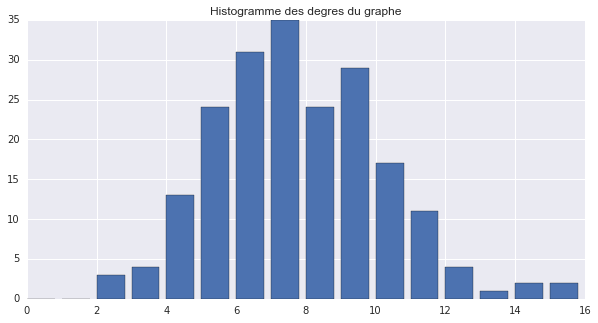

In [387]:
sns.axes_style("darkgrid")
sns.color_palette("colorblind", 10)
plt.figure(figsize=(10, 5))
plt.bar(range(len(nx.degree_histogram(G_erdos))), nx.degree_histogram(G_erdos))
plt.title('Histogramme des degres du graphe')

#### L'histogramme est bel est bien à ce que l'on s'attend en théorie.

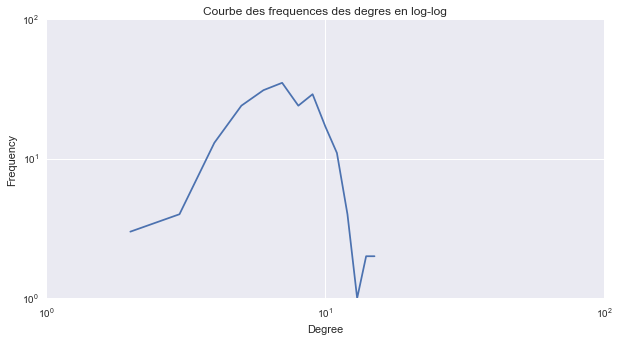

In [6]:
def loglog_degrees(nxgraph):
    t = nx.degree_histogram(nxgraph)
#     degree_sequence=sorted(t,reverse=True)
    plt.figure(figsize=(10, 5))
    plt.loglog(t)
    plt.ylabel( "Frequency")
    plt.xlabel( "Degree" )
    plt.title('Courbe des frequences des degres en log-log')
    
loglog_degrees(G_erdos)

#### La courbe des fréquences des degrés en log-log est en cloche. 

#### Question 4

In [393]:
cluster_coef = nx.average_clustering(G_erdos)
print "Le coefficient de clustering moyen du graphe est", cluster_coef
print "Le degre moyen (en esperance) est : ", p
print "Pour un graphe Erdos-Renyi, on s'approche de la valeur théorique."

Le coefficient de clustering moyen du graphe est 0.0388838938839
Le degre moyen (en esperance) est :  0.04
Pour un graphe Erdos-Renyi, on s'approche de la valeur théorique.


#### Question 5

Le coefficient de clustering est faible, d'où le fait qu'on puisse parler d'un effet de "small world".

In [394]:
# Calcul du diamètre
print "Le diametre du graphe est ", nx.diameter(G_erdos)

# Average length of shortest paths
print "Average length of shortest paths", nx.average_shortest_path_length(G_erdos)

Le diametre du graphe est  5
Average length of shortest paths 2.84407035176


#### Comparé au nombre de noeuds, le diamètre du graphe est élevé ", en plus de la valeur moyenne du plus court chemin, on peut conclure qu'on est dans un phénomène de "Small world".

#### Question 6

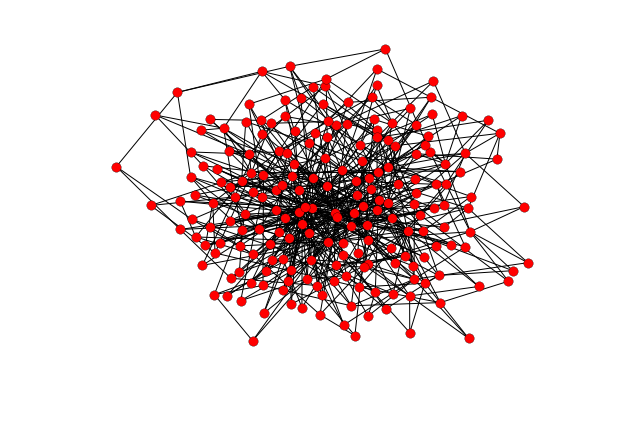

In [10]:
n = 200
m = 3
G_barabasi = nx.barabasi_albert_graph(n, m, seed=42)
nx.draw(G_barabasi, node_size=90)

In [11]:
print "Nombre d'aretes: ", G_barabasi.number_of_edges()
print "Nombre de noeuds: ", G_barabasi.number_of_nodes()

Nombre d'aretes:  591
Nombre de noeuds:  200


In [12]:
print "Degres par noeud :"
degree_by_node_df = pd.DataFrame.from_dict(G_barabasi.degree(), orient='index')
degree_by_node_df.T

Degres par noeud :


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,35,18,10,28,19,36,16,18,26,17,...,3,3,3,3,3,3,3,3,3,3


In [18]:
print "Degre maximal :"
mx = max(degree_by_node_df[0])
print mx
print "Noeud(s) de degre max.: "
higher_degree_nodes_df = degree_by_node_df[degree_by_node_df[0] == mx]
higher_degree_nodes_df.T

Degre maximal :
36
Noeud(s) de degre max.: 


,5
0,36


In [19]:
print "Degre minimal :"
mx = min(degree_by_node_df[0])
print mx
print "Noeud(s) de degre min.: "
higher_degree_nodes_df = degree_by_node_df[degree_by_node_df[0] == mx]
higher_degree_nodes_df.T

Degre minimal :
3
Noeud(s) de degre min.: 


,25,45,49,59,60,63,67,68,76,78,...,190,191,192,193,194,195,196,197,198,199
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [21]:
print "Degre median"
mx = np.median(degree_by_node_df[0])
print mx
print "Noeud(s) de degre médian : "
higher_degree_nodes_df = degree_by_node_df[degree_by_node_df[0] == mx]
higher_degree_nodes_df.T

Degre median
4.0
Noeud(s) de degre médian : 


,11,22,29,31,38,41,42,44,53,54,...,154,157,164,168,169,170,171,178,180,185
0,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [22]:
print "degre moyen.: "
mx = np.mean(degree_by_node_df[0])
print mx

degre moyen.: 
5.91


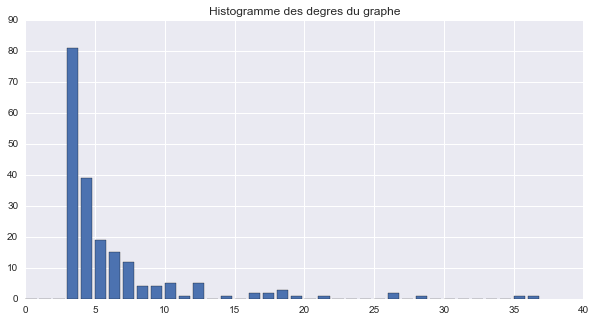

In [24]:
sns.axes_style("darkgrid")
sns.color_palette("colorblind", 10)
plt.figure(figsize=(10, 5))
plt.bar(range(len(nx.degree_histogram(G_barabasi))), nx.degree_histogram(G_barabasi))
plt.title('Histogramme des degres du graphe')

#### On retrouve le même comportoment théorique.

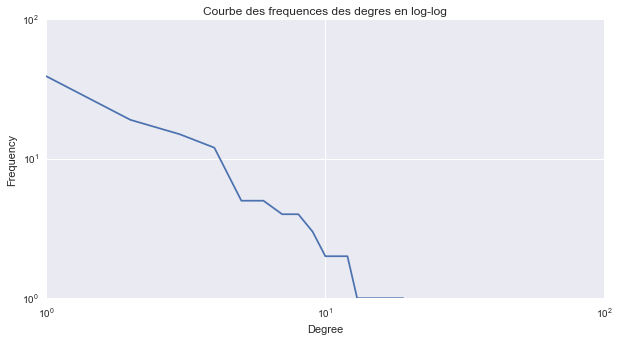

In [285]:
def loglog_degrees(nxgraph):
    t = nx.degree_histogram(nxgraph)
#     frq = np.bincount(t)
    degree_sequence=sorted(t,reverse=True)
    plt.figure(figsize=(10, 5))
    plt.loglog(degree_sequence)
    plt.ylabel( "Frequency")
    plt.xlabel( "Degree" )
    plt.title('Courbe des frequences des degres en log-log')
    
loglog_degrees(G_barabasi)

In [206]:
cluster_coef = nx.average_clustering(G_barabasi)
print "Le coefficient de clustering moyen du graphe est", cluster_coef

Le coefficient de clustering moyen du graphe est 0.0962350893889


#### La Courbe des fréquences des degrés en log-log est presque linéaire ce qui est compatible avec les "power law" distributions (une loi de puissance). 

## Graphe Karate Club

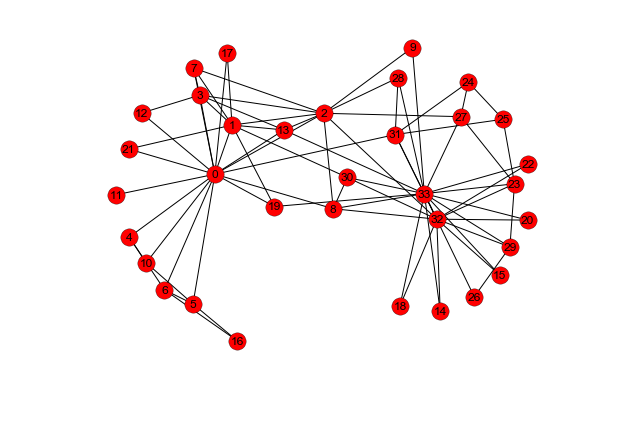

In [48]:
n=34
G_karate = nx.karate_club_graph()

# on définit une position des noeuds qui peut être ré-utilisée plusieurs fois
# en appelant la fonction nx.draw avec l'option pos=pos
pos = nx.spring_layout(G_karate)
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)

#### Question 7

In [49]:
# le code suivant calcule une matrice de taille n x n
# distances[i, j] contient la longueur du plus court chemin entre les noeuds i et j
pcc_longueurs=nx.all_pairs_shortest_path_length(G_karate)
distances=np.zeros((n,n))

for i in range(n):
    for j in range(n):
        distances[i, j] = pcc_longueurs[i][j]


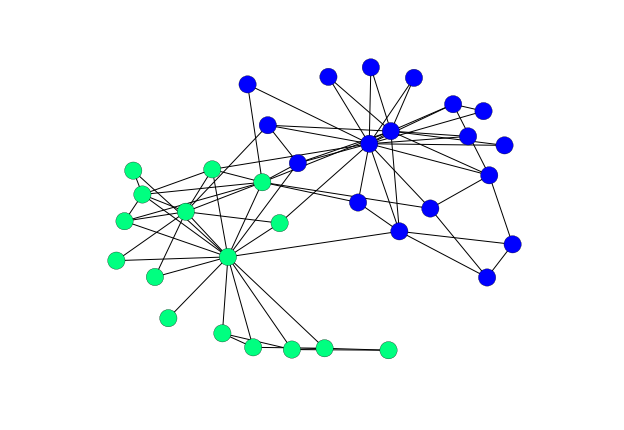

In [50]:
# Cas de deux clusters
clustering = AgglomerativeClustering(linkage='average', n_clusters=2, affinity='precomputed')
clustering.fit(distances)
nx.draw(G_karate, node_color=clustering.labels_, cmap='winter')

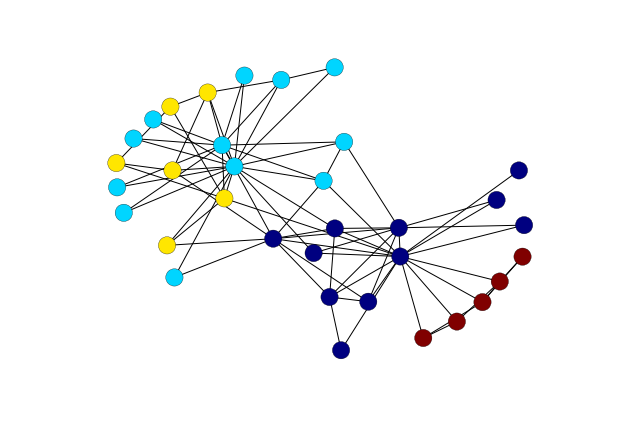

In [51]:
# Cas de quatres clusters
clustering = AgglomerativeClustering(linkage='average', n_clusters=4, affinity='precomputed')
clustering.fit(distances)
nx.draw(G_karate, node_color=clustering.labels_, cmap='jet')

#### Question 8

On va mettre en évidence visuellement les différences entre quelques mesures de centralité des noeuds

#### Degree :

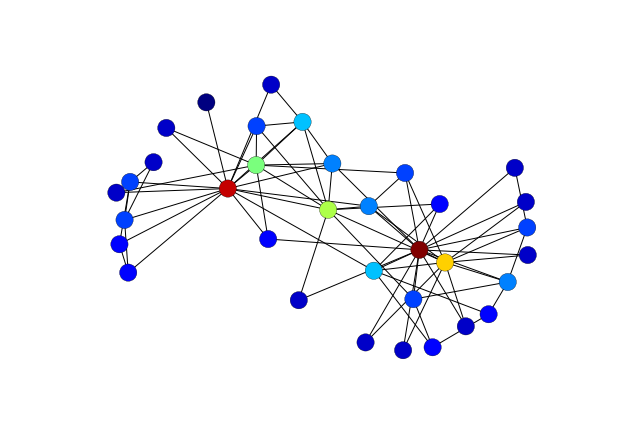

In [52]:
# conseil: utiliser l'option cmap = plt.get_cmap('jet') de nx.draw
# les couleurs iront du bleu foncé (peu central) au rouge foncé (très central)

# Degree
nx.draw(G_karate, node_color=[nx.degree_centrality(G_karate)[key] for key in xrange(len(nx.degree_centrality(G_karate)))], cmap='jet')

#### Eigenvector :

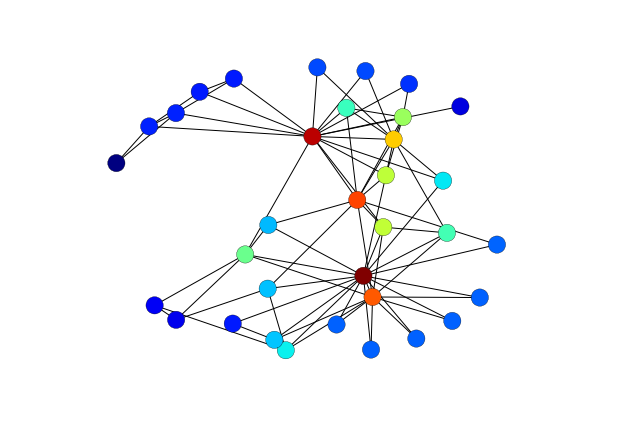

In [53]:
# Eigenvector
nx.draw(G_karate, node_color=[nx.eigenvector_centrality(G_karate)[key] for key in xrange(len(nx.degree_centrality(G_karate)))], cmap='jet')

#### Closeness :

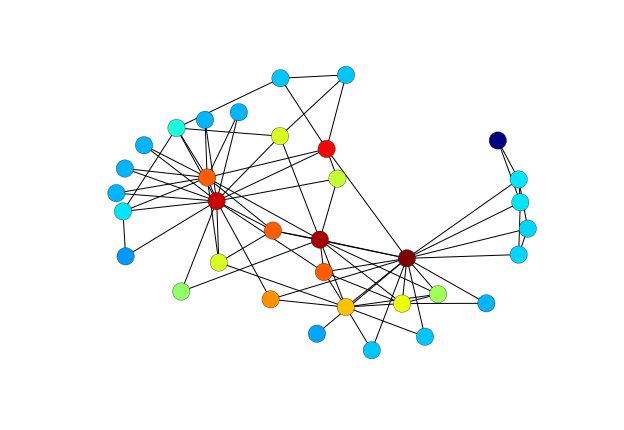

In [54]:
# Closeness
nx.draw(G_karate, node_color=[nx.closeness_centrality(G_karate)[key] for key in xrange(len(nx.degree_centrality(G_karate)))], cmap='jet')

#### Betweeness :

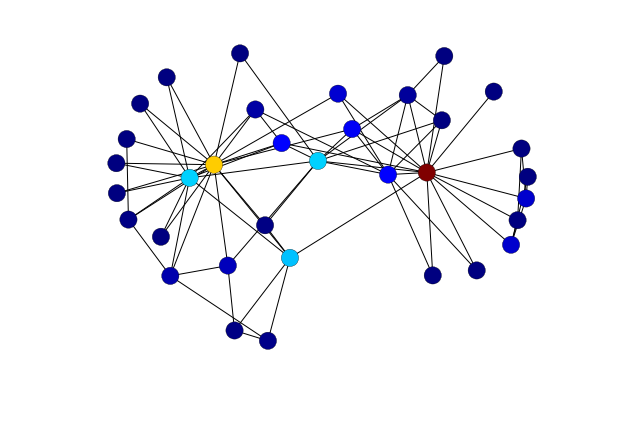

In [55]:
# Betweeness
nx.draw(G_karate, node_color=[nx.betweenness_centrality(G_karate)[key] for key in xrange(len(nx.degree_centrality(G_karate)))], cmap='jet')

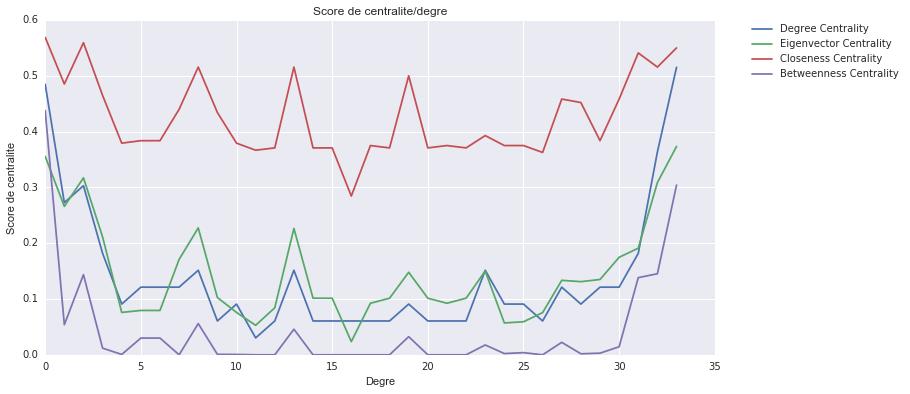

In [305]:
plt.figure(figsize=(12,6))
plt.plot([key for key in nx.degree_centrality(G_karate)], [nx.degree_centrality(G_karate)[key] for key in xrange(len(nx.degree_centrality(G_karate)))], label='Degree Centrality')
plt.plot([key for key in nx.eigenvector_centrality(G_karate)], [nx.eigenvector_centrality(G_karate)[key] for key in xrange(len(nx.eigenvector_centrality(G_karate)))], label='Eigenvector Centrality')
plt.plot([key for key in nx.closeness_centrality(G_karate)], [nx.closeness_centrality(G_karate)[key] for key in xrange(len(nx.closeness_centrality(G_karate)))], label='Closeness Centrality')
plt.plot([key for key in nx.betweenness_centrality(G_karate)], [nx.betweenness_centrality(G_karate)[key] for key in xrange(len(nx.betweenness_centrality(G_karate)))], label='Betweenness Centrality')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Degre")
plt.ylabel("Score de centralite")
plt.title("Score de centralite/degre")

#### On remarque que les différentes métriques ne rendent pas le même résultat. Certaines métriques restituent une meilleure centralité, mais les quatres métriques présentent le même profil, avec une certaine proximité avec les noeuds extrêmes. Ceci peut s'expliquer avec la particularité de notre cas du Club de Karaté, qui, il s'avère, après recherche, que :

#### During the study a conflict arose between the administrator "John A" and instructor "Mr. Hi" (pseudonyms), which led to the split of the club into two. Half of the members formed a new club around Mr. Hi, members from the other part found a new instructor or gave up karate.

#### Les deux noeuds extrêmes desquels s'approchent les autres noeuds sont l'instructeur et l'administrateur. Ceci aussi se voit à travers les graphes.

### Graphe des produits Amazon

#### Question 9 (bonus +2 pts)

In [25]:
if os.path.exists('amazon.txt.gz') is False:
    resp = urllib.urlretrieve('https://snap.stanford.edu/data/bigdata/' +
                              'communities/com-amazon.ungraph.txt.gz', 'amazon.txt.gz')

G_amazon = nx.read_edgelist('amazon.txt.gz')

In [320]:
print "Nombre d'aretes: ", G_amazon.number_of_edges()
print "Nombre de noeuds: ", G_amazon.number_of_nodes()

#DEGREE NODES
degree_node = nx.degree(G_amazon)
#print 'Le degré de tous les nœuds est: \n',degree_node
maxval = max(degree_node.values())
print 'le maximum des degrés des nœuds du graphe ', maxval
minval = min(degree_node.values())
print 'le minimum des degrés des nœuds du graphe ', minval
moyenne= np.mean((degree_node.values()))
print 'la moyenne des degrés des nœuds du graphe ', moyenne
mediane=np.median((degree_node.values()))
print 'la mediane des degrés des nœuds du graphe ', mediane


Nombre d'aretes:  925872
Nombre de noeuds:  334863
le maximum des degrés des nœuds du graphe  549
le minimum des degrés des nœuds du graphe  1
la moyenne des degrés des nœuds du graphe  5.52985549314
la mediane des degrés des nœuds du graphe  4.0


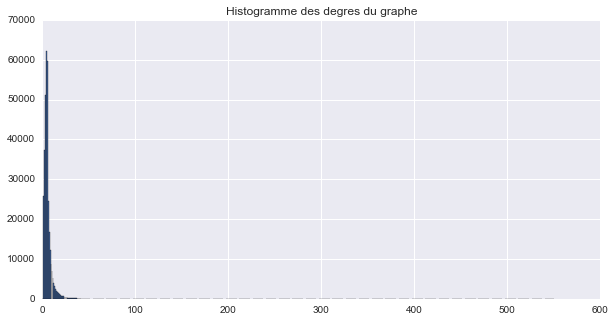

In [30]:
sns.axes_style("darkgrid")
sns.color_palette("colorblind", 10)
plt.figure(figsize=(10, 5))
plt.bar(range(len(nx.degree_histogram(G_amazon))), nx.degree_histogram(G_amazon))
plt.title('Histogramme des degres du graphe')

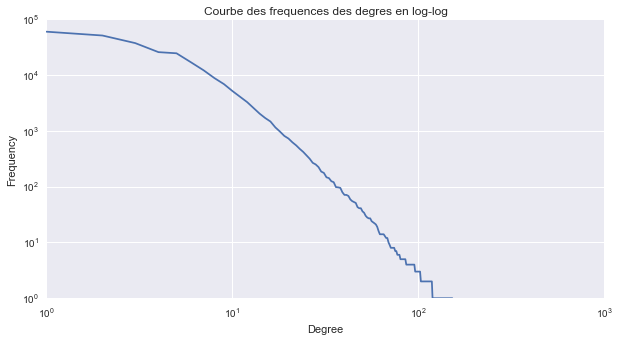

In [318]:
loglog_degrees(G_amazon)

#### Calculons les coefficients de clustering et affichons les sur un histogramme

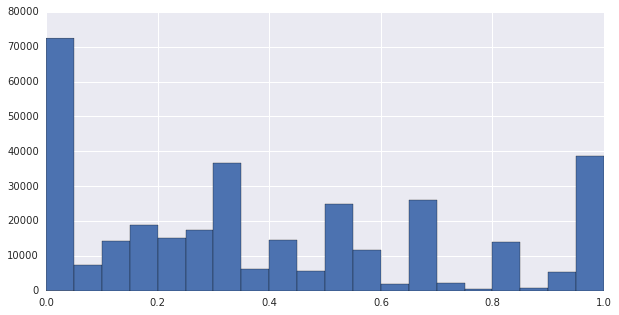

In [391]:
def clustering_histogram(nxgraph):
    cluster_coefs = nx.clustering(nxgraph)
    ccoefs = np.array([cluster_coefs[key] for key in cluster_coefs.keys()])
    plt.figure(figsize=(10, 5))
    plt.hist(ccoefs, bins=20)
clustering_histogram(G_amazon)

La majorité des noeuds sont de deux natures distinctes :<br>
<ul>
<li>soit ils présentent un coefficient de clustering très faible (première barre);</li>
<li>soit leur coefficient de clustering est très proche de 1 (dernière barre) ou proche de 0.3 (barre intermédiaire).</li>
</ul>

#### Plot du coefficient de clustering moyen en fonction du degré des noeuds en échelle log-log :

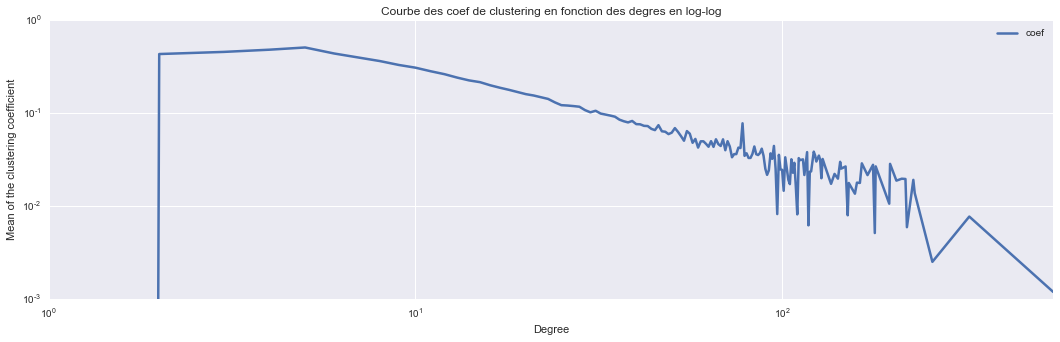

In [34]:
def clustering_vs_degrees_log(nx_graph):
    cluster_coefs = nx.clustering(nx_graph)
    degree_df = pd.DataFrame.from_dict(nx_graph.degree(), orient='index').T
    ccoef_df = pd.DataFrame.from_dict(cluster_coefs, orient='index').T
    df = pd.concat([degree_df, ccoef_df]).T
    df.columns = ['deg', 'coef']
    df = pd.DataFrame(df.groupby(['deg'])['coef'].mean())
    df.plot(figsize=(18, 5),  linewidth=2.5, loglog=True)
    plt.ylabel( "Mean of the clustering coefficient")
    plt.xlabel( "Degree" )
    plt.title('Courbe des coef de clustering en fonction des degres en log-log')
    
clustering_vs_degrees_log(G_amazon)

#### Le graphe peut nous indiquer que la structure du graphe est une structure hiéarchique entre tous les produits.

## Prédiction dans les graphes

Nombre de noeuds: 150
Nombre d'arêtes: 1693
Nombre de composantes connexes: 2


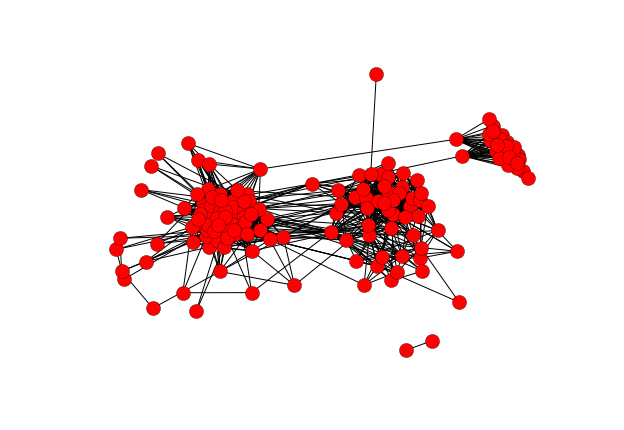

In [37]:
if os.path.exists('facebook.tar.gz') is False:
    resp = urllib.urlretrieve('https://snap.stanford.edu/data/facebook.tar.gz',
                              'facebook.tar.gz')
    tarfile.open("facebook.tar.gz", 'r:gz').extractall('.')

G_fb = nx.read_edgelist("facebook/414.edges")
n = G_fb.number_of_nodes()
m = G_fb.number_of_edges()
# on renumérote les noeuds de 0 à n-1
mapping=dict(zip(G_fb.nodes(), range(n)))
nx.relabel_nodes(G_fb, mapping, copy=False)
pos = nx.spring_layout(G_fb)
nx.draw(G_fb, node_size=200, pos=pos)
print("Nombre de noeuds: %d" % n)
print("Nombre d'arêtes: %d" % m)
print("Nombre de composantes connexes: %d" % nx.number_connected_components(G_fb))

#### Question 10

In [8]:
# G_fb_train est une copie du graphe original
# auquel on a retiré 20% des arêtes choisies aléatoirement

proportion_edges = 0.2
edge_subset = random.sample(G_fb.edges(),
                            int(proportion_edges * G_fb.number_of_edges()))
G_fb_train = G_fb.copy()
G_fb_train.remove_edges_from(edge_subset)

edge_subset_size = len(list(edge_subset))
print("Nombre d'arêtes retirées: %d" % edge_subset_size)
print("Nombre d'arêtes restantes: %d" % (m - edge_subset_size))
print("Nombre total d'arêtes non-existantes: %d" %
      len(list(nx.non_edges(G_fb_train))))

Nombre d'arêtes retirées: 338
Nombre d'arêtes restantes: 1355
Nombre total d'arêtes non-existantes: 9820


On veut scorer les arêtes non-existantes de façon à ce que les arêtes réelles retirées aient un plus grand score. On utilise plusieurs mesures de similarité entre paires de noeud et on calcule l'Aire sous la Courbe ROC (AUC). On trace également les courbes ROC pour chaque similarité.

In [9]:
# Jaccard
pred_jaccard = list(nx.jaccard_coefficient(G_fb_train))
score_jaccard, label_jaccard = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_jaccard])
fpr_jaccard, tpr_jaccard, thresholds = metrics.roc_curve(label_jaccard, score_jaccard)
auc_jaccard = metrics.auc(fpr_jaccard, tpr_jaccard)

# Adamic_Adar
pred_ada = list(nx.adamic_adar_index(G_fb_train))
score_ada, label_ada = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_ada])
fpr_adamic, tpr_adamic, thresholds = metrics.roc_curve(label_ada, score_ada)
auc_adamic = metrics.auc(fpr_adamic, tpr_adamic)

# Pref
pred_pref = list(nx.preferential_attachment(G_fb_train))
score_pref, label_pref = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_pref])
fpr_pref, tpr_pref, thresholds = metrics.roc_curve(label_pref, score_pref)
auc_pref = metrics.auc(fpr_pref, tpr_pref)

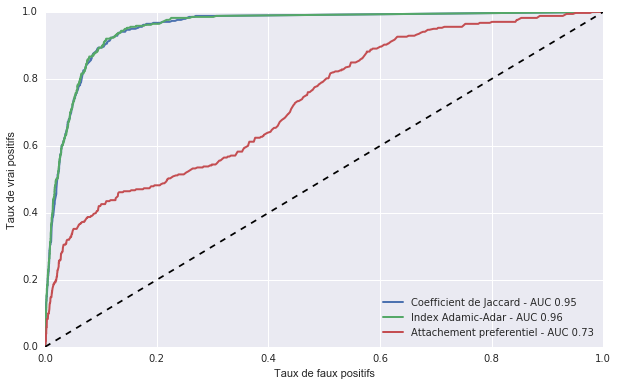

In [350]:
# afficher ROC curve et AUC
plt.figure(figsize=(10, 6))
plt.plot(fpr_jaccard, tpr_jaccard, label='Coefficient de Jaccard - AUC %.2f' % auc_jaccard, linewidth=2)
plt.plot(fpr_adamic, tpr_adamic, label='Index Adamic-Adar - AUC %.2f' % auc_adamic, linewidth=2)
plt.plot(fpr_pref, tpr_pref, label='Attachement preferentiel - AUC %.2f' % auc_pref, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrai positifs')
plt.legend(loc='lower right')
plt.show()

Les trois scores de similiarité ne rendent pas les mêmes résultalts :<br>
<ul>
<li>Le coefficient de Jaccard et l'index Adamic-Adar donnent un meilleur résultat.</li>
<li>L'attachement préférentiel ne donne pas un très bon résultat.</li>
</ul>

L'attachement préférentiel n'utilise pas la relation entre les noeuds (N (i) ∩ N (j)), contrairement aux autres métriques de similarité qui se basent sur les voisins en commun, ce qui rend un meilleur score.

#### Question 11

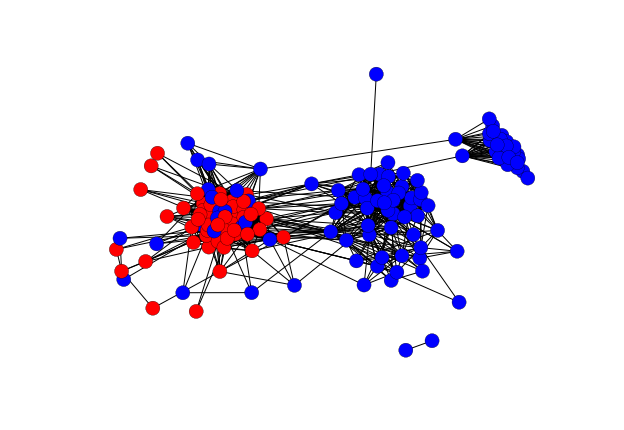

In [38]:
# on charge les labels des noeuds et on les affiche

with open('facebook/414.featnames') as f:
    for i, l in enumerate(f):
        pass

n_feat = i+1

features = np.zeros((n, n_feat))
f = open('facebook/414.feat', 'r')
for line in f:
    if line.split()[0] in mapping:
        node_id = mapping[line.split()[0]]
        features[node_id, :] = list(map(int, line.split()[1:]))

features = 2*features-1
feat_id = 43
labels = features[:, feat_id]

nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = labels, node_size=200, pos=pos)

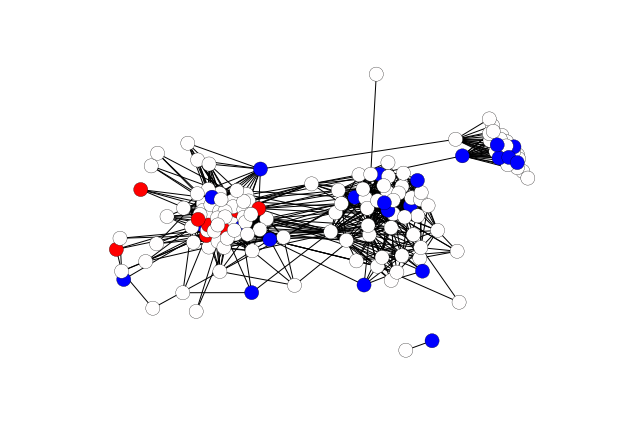

In [39]:
# on sélectionne 20% des noeuds pour lesquels on a accès à l'étiquette

random.seed(5)
proportion_nodes = 0.2
labeled_nodes = random.sample(G_fb.nodes(), int(proportion_nodes * G_fb.number_of_nodes()))

known_labels = np.zeros(n)
known_labels[labeled_nodes] = labels[labeled_nodes]

nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = known_labels, node_size=200, pos=pos)

On va maintenant appliquer la propagation de label et voir les résultats

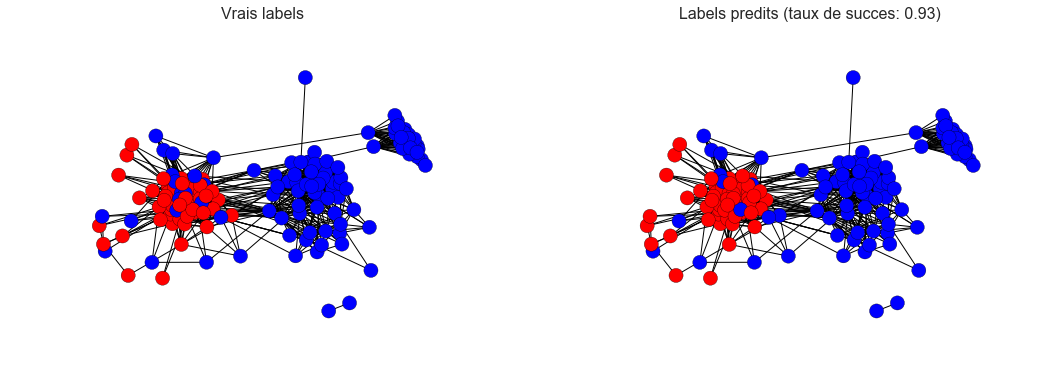

In [46]:
alpha = 0.7
L_sym = nx.normalized_laplacian_matrix(G_fb)

# on calcule la matrice de labels initiale
Y = np.zeros((n,2))
Y[known_labels==-1, 0] = 1
Y[known_labels==1, 1] = 1

# propagation de labels à faire ici

# labels prédits à mettre dans F_pred pour affichage ci-dessous
F_pred = np.argmax(np.dot(np.linalg.inv(( 1 - alpha) * np.eye(n) + L_sym),Y), axis = 1)
F_pred = np.array(np.array(F_pred).reshape(-1,).tolist())
F_pred[F_pred == 0] = -1
pred1 = accuracy_score(F_pred, labels)

# # Méthode itérative
# F = Y
# # Iterate the following until convergence
# for t in range(n):
#     F = (np.dot(alpha * ( np.eye(n) - L_sym), F) + (1 - alpha) * Y)   

# F_pred2 = np.argmax(F, axis=1)
# F_pred2 = np.array(np.array(F_pred2).reshape(-1,).tolist())
# F_pred2[F_pred == 0] = -1
# pred2 = accuracy_score(F_pred2, labels)


plt.figure(figsize=(18, 6))
f, axarr = plt.subplots(1, 2, num=1)
plt.sca(axarr[0])
nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = labels, node_size=200, pos=pos)
axarr[0].set_title('Vrais labels', size=16)
plt.sca(axarr[1])
nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = F_pred, node_size=200, pos=pos)
axarr[1].set_title('Labels predits (taux de succes: %.2f)' % pred1, size=16)